<a href="https://colab.research.google.com/github/Charanpoojary/PROJECT-10-EDA-tourism-turkey/blob/main/Travel_industry_turkey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TURKEY** **TOURIST** **DATASET**

In [ ]:
# Importing libraries
import numpy as np   # for creating any array
import pandas as pd  # for creating any dataframe
import matplotlib.pyplot as plt   # for visualisation
# importing all the libraries that is needed for model building
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading teh file path
file_path = '/content/drive/MyDrive/Datasets/tourist_data.csv'
df=pd.read_csv(file_path)

In [ ]:
df.head()   # returns the top 5 rows of the dataset

,Date,ALMANYA,ARNAVUTLUK,AVUSTURYA,BELCIKA,BOSNAHERSEK,BULGARISTAN,CEKCUMHURIYETI,DANIMARKA,ESTONYA,...,TAYLAND,URDUN,YEMEN,DASYA,ASYATOP,AVUSTRALYA,YENIZELLANDA,OKYANUSYA,MILLIYESIZ,GTOPLAM
0,2008-01-01,17723300.0,281100.0,2020700.0,1238900.0,254600.0,9904800.0,182400.0,561300.0,42600.0,...,56300.0,278700.0,11600.0,292100.0,13698000.0,482300.0,49700.0,300.0,105600.0,91953900.0
1,2008-02-01,14366600.0,260400.0,1629500.0,1130900.0,234200.0,8270700.0,206400.0,546400.0,51500.0,...,51600.0,259400.0,29900.0,319100.0,15394600.0,325400.0,39400.0,1100.0,94700.0,85875100.0
2,2008-03-01,24979700.0,362600.0,2355800.0,2109700.0,295200.0,10287700.0,252400.0,1128800.0,69500.0,...,100300.0,328000.0,28700.0,407300.0,21571100.0,357100.0,59200.0,6900.0,123300.0,122156800.0
3,2008-04-01,24253100.0,321900.0,2266800.0,3077200.0,353900.0,11062700.0,419800.0,1087800.0,109800.0,...,108100.0,345500.0,33100.0,454700.0,22719100.0,1008400.0,224900.0,7000.0,130400.0,141149500.0
4,2008-05-01,39972400.0,415600.0,3226500.0,5048300.0,470900.0,14864200.0,928600.0,2600800.0,450800.0,...,100500.0,433600.0,44400.0,785400.0,25861000.0,1301100.0,260600.0,1100.0,148100.0,250999700.0


In [ ]:
df.tail()   # returns the bottom 5 rows of the dataset

,Date,ALMANYA,ARNAVUTLUK,AVUSTURYA,BELCIKA,BOSNAHERSEK,BULGARISTAN,CEKCUMHURIYETI,DANIMARKA,ESTONYA,...,TAYLAND,URDUN,YEMEN,DASYA,ASYATOP,AVUSTRALYA,YENIZELLANDA,OKYANUSYA,MILLIYESIZ,GTOPLAM
160,2021-05-01,6029500.0,407600.0,617200.0,725800.0,432700.0,5757300.0,147900.0,194200.0,391800.0,...,33100.0,755100.0,67200.0,802800.0,12260500.0,61500.0,9700.0,1300.0,242500.0,75751800.0
161,2021-06-01,13712400.0,823300.0,1064700.0,1108900.0,1239500.0,11812500.0,592300.0,352500.0,466000.0,...,33400.0,2689000.0,106900.0,1402500.0,23848500.0,63600.0,15100.0,1700.0,456800.0,149195500.0
162,2021-07-01,40401800.0,1139500.0,3079800.0,4046600.0,2002900.0,15619400.0,1740500.0,2293400.0,627300.0,...,41500.0,6351300.0,200800.0,2532400.0,47590800.0,123400.0,29600.0,2300.0,799800.0,323155500.0
163,2021-08-01,81173400.0,1559000.0,9955200.0,11891300.0,2838500.0,14719300.0,2076900.0,2491700.0,651000.0,...,51900.0,6053400.0,264000.0,3320400.0,51612500.0,138300.0,31400.0,4400.0,998200.0,457826500.0
164,2021-09-01,52229000.0,1047100.0,4325100.0,4838700.0,1934300.0,16042500.0,1972700.0,1231700.0,712100.0,...,57300.0,4114600.0,183300.0,2544700.0,49560600.0,127600.0,28000.0,2500.0,771200.0,364813100.0


In [ ]:
df.shape # returns the no of rows and columns of the dataset

(165, 103)

In [ ]:
df.columns  # returns all the columns in the dataset

Index(['Date', ' ALMANYA', ' ARNAVUTLUK', ' AVUSTURYA', ' BELCIKA',
       ' BOSNAHERSEK', ' BULGARISTAN', ' CEKCUMHURIYETI', ' DANIMARKA',
       ' ESTONYA',
       ...
       ' TAYLAND', ' URDUN', ' YEMEN', ' DASYA', ' ASYATOP', ' AVUSTRALYA',
       ' YENIZELLANDA', ' OKYANUSYA', ' MILLIYESIZ', ' GTOPLAM'],
      dtype='object', length=103)

In [ ]:
df.info() # returns the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Columns: 103 entries, Date to  GTOPLAM
dtypes: float64(102), object(1)
memory usage: 132.9+ KB


In [ ]:
df.describe()     # returns the basic information of the numerical dataset

,ALMANYA,ARNAVUTLUK,AVUSTURYA,BELCIKA,BOSNAHERSEK,BULGARISTAN,CEKCUMHURIYETI,DANIMARKA,ESTONYA,FINLANDIYA,...,TAYLAND,URDUN,YEMEN,DASYA,ASYATOP,AVUSTRALYA,YENIZELLANDA,OKYANUSYA,MILLIYESIZ,GTOPLAM
count,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,...,1.650000e+02,1.650000e+02,165.00000,1.650000e+02,1.650000e+02,1.650000e+02,165.000000,165.00000,1.650000e+02,1.650000e+02
mean,3.595753e+07,6.495339e+05,3.498824e+06,4.344815e+06,6.686321e+05,1.412762e+07,1.479748e+06,2.577336e+06,3.646770e+05,1.181257e+06,...,1.766012e+05,1.526644e+06,150910.30303,1.354098e+06,4.080129e+07,1.058582e+06,179712.121212,7069.69697,3.716103e+05,2.549121e+08
std,2.347812e+07,3.809939e+05,2.929719e+06,3.721033e+06,4.507163e+05,5.119292e+06,1.614864e+06,2.241254e+06,3.133718e+05,9.548221e+05,...,1.722806e+05,1.579652e+06,108814.75455,1.113537e+06,2.072857e+07,8.775521e+05,148703.585006,28050.21939,2.529696e+05,1.459476e+08
min,1.740000e+05,5.340000e+04,1.150000e+04,1.260000e+04,4.770000e+04,6.562000e+05,3.500000e+03,4.200000e+03,1.000000e+02,1.900000e+03,...,7.000000e+02,8.700000e+03,800.00000,1.613000e+05,1.167100e+06,4.300000e+03,400.000000,100.00000,7.000000e+03,5.063000e+06
25%,1.481080e+07,3.823000e+05,1.571900e+06,1.358800e+06,3.810000e+05,1.090590e+07,2.863000e+05,6.760000e+05,8.500000e+04,3.232000e+05,...,6.810000e+04,5.451000e+05,59500.00000,6.094000e+05,2.684090e+07,3.571000e+05,57900.000000,1400.00000,1.936000e+05,1.333541e+08
50%,3.277280e+07,5.233000e+05,2.355800e+06,3.181300e+06,5.396000e+05,1.415340e+07,6.022000e+05,1.878600e+06,3.078000e+05,1.034800e+06,...,1.182000e+05,9.542000e+05,126500.00000,9.390000e+05,3.769000e+07,7.551000e+05,119600.000000,2600.00000,2.951000e+05,2.096105e+08
75%,5.198490e+07,8.528000e+05,4.325100e+06,5.441500e+06,8.710000e+05,1.654540e+07,2.526700e+06,3.992500e+06,5.711000e+05,1.826800e+06,...,2.333000e+05,1.826900e+06,229800.00000,1.549800e+06,4.987400e+07,1.681300e+06,299700.000000,4900.00000,4.578000e+05,3.642977e+08
max,9.459020e+07,2.055600e+06,1.452050e+07,1.584200e+07,2.838500e+06,3.004440e+07,7.339600e+06,8.636700e+06,1.587400e+06,3.889900e+06,...,1.019700e+06,9.265500e+06,570200.00000,6.120800e+06,1.328552e+08,4.060000e+06,558200.000000,282000.00000,1.470300e+06,7.018257e+08


In [ ]:
df.isnull().sum()    # checking for the null values in each columns

Date             0
 ALMANYA         0
 ARNAVUTLUK      0
 AVUSTURYA       0
 BELCIKA         0
                ..
 AVUSTRALYA      0
 YENIZELLANDA    0
 OKYANUSYA       0
 MILLIYESIZ      0
 GTOPLAM         0
Length: 103, dtype: int64

In [ ]:
# there is no null values present in our dataset

translating the columns into English 

In [ ]:
df.set_axis(["DATE", "GERMANY" ,
 "ALBANIA",
 "AUSTRIA",
 "BELGIUM",
 "BOSNIA AND HERZEGOVINA",
 "BULGARIA" ,
 "CZECH REPUBLIC" ,
 "DENMARK" ,
 "ESTONIA" ,
 "FINLAND" ,
 "FRANCE" ,
 "CYPRUS" ,
 "CROATIA" ,
 "HOLLAND" ,
 "ENGLAND" ,
 "IRLAND" ,
 "SPAIN" ,
 "SWEDEN" ,
 "SWITZERLAND" ,
 "ITALY" ,
 "ICELAND" ,
 "MONTENEGRO" ,
 "KOSOVO" ,
 "LATVIA" ,
 "LITHUANIA" ,
 "LUXEMBURG" ,
 "HUNGARY" ,
 "MAKEDONIA" ,
 "MALTA" ,
 "NORWAY" ,
 "POLAND" ,
 "PORTUGAL" ,
 "ROMANIA" ,
 "SERBIA" ,
 "SLOVAKIA" ,
 "SLOVENIA" ,
 "GREECE" ,
 "OTHER EUROPE" ,
 "EUROPEAN" ,
 "AZERBAIJAN"  ,
 "BELARUS" ,
 "ARMENIA" ,
 "GEORGIA" ,
 "KAZAKHISTAN" ,
 "Kyrgyzstan" ,
 "MOLDOVACUM" ,
 "OZBEKISTAN",
 "RUSSIA" ,
 "TACHIKISTAN" ,
 "TURKMENISTAN" ,
 "UKRAINE" ,
 "SUM OF CIS" ,
 "USA" ,
 "ARGENTINE" ,
 "BRAZIL" ,
 "CANADA" ,
 "COLOMBIA" ,
 "MEXICO" ,
 "CHILE" ,
 "VENEZUELA" ,
 "OTHER AMERICA" ,
 "AMERICA" ,
 "ALGERIA" ,
 "MOROCCO" ,
 "AFRICA" ,
 "LIBYA" ,
 "EGYPT" ,
 "SUDAN" ,
 "TUNISIA" ,
 "OTHER AFRICA" ,
 "SUM OF AFRICA" ,
 "UAE" ,
 "BAHRAIN" ,
 "BANGLADESH" ,
 "CHINA" ,
 "INDONESIA" ,
 "PHILIPPINES" ,
 "SOUTH KOREA" ,
 "INDIA" ,
 "IRAQ" ,
 "IRAN" ,
 "ISRAEL" ,
 "JAPAN" ,
 "NORTHERN CYPRUS" ,
 "QATAR" ,
 "KUWAIT" ,
 "LEBANON" ,
 "MALAYSIA" ,
 "PAKISTAN" ,
 "SINGAPORE" ,
 "SYRIA" ,
 "SUUDARABIA" ,
 "THAILAND" ,
 "URDUN" ,
 "YEMEN" ,
 "OTHER ASIA" ,
 "ASIA" ,
 "AUSTRALIA" ,
 "NEW ZEALAND" ,
 "OCEANIA" ,
 "WITHOUT NATION",
 "GENERAL TOTAL"] , axis=1, inplace=True)

In [ ]:
df.head()    # rechecking the data after setting the colummns

,DATE,GERMANY,ALBANIA,AUSTRIA,BELGIUM,BOSNIA AND HERZEGOVINA,BULGARIA,CZECH REPUBLIC,DENMARK,ESTONIA,...,THAILAND,URDUN,YEMEN,OTHER ASIA,ASIA,AUSTRALIA,NEW ZEALAND,OCEANIA,WITHOUT NATION,GENERAL TOTAL
0,2008-01-01,17723300.0,281100.0,2020700.0,1238900.0,254600.0,9904800.0,182400.0,561300.0,42600.0,...,56300.0,278700.0,11600.0,292100.0,13698000.0,482300.0,49700.0,300.0,105600.0,91953900.0
1,2008-02-01,14366600.0,260400.0,1629500.0,1130900.0,234200.0,8270700.0,206400.0,546400.0,51500.0,...,51600.0,259400.0,29900.0,319100.0,15394600.0,325400.0,39400.0,1100.0,94700.0,85875100.0
2,2008-03-01,24979700.0,362600.0,2355800.0,2109700.0,295200.0,10287700.0,252400.0,1128800.0,69500.0,...,100300.0,328000.0,28700.0,407300.0,21571100.0,357100.0,59200.0,6900.0,123300.0,122156800.0
3,2008-04-01,24253100.0,321900.0,2266800.0,3077200.0,353900.0,11062700.0,419800.0,1087800.0,109800.0,...,108100.0,345500.0,33100.0,454700.0,22719100.0,1008400.0,224900.0,7000.0,130400.0,141149500.0
4,2008-05-01,39972400.0,415600.0,3226500.0,5048300.0,470900.0,14864200.0,928600.0,2600800.0,450800.0,...,100500.0,433600.0,44400.0,785400.0,25861000.0,1301100.0,260600.0,1100.0,148100.0,250999700.0


In [ ]:
df.dtypes  # checking the datatype of our dataset

DATE               object
GERMANY           float64
ALBANIA           float64
AUSTRIA           float64
BELGIUM           float64
                   ...   
AUSTRALIA         float64
NEW ZEALAND       float64
OCEANIA           float64
WITHOUT NATION    float64
GENERAL TOTAL     float64
Length: 103, dtype: object

In [ ]:
# so lets convert all the floats values to int(so our dataset will be very much clear)

In [ ]:
df.iloc[:,1:]=((df.iloc[:,1:])/100).astype('int')  # dividing all the values by 100 and coverting them into int using astype function

In [ ]:
df.head()     # check the dataset after dividing it by 100

,DATE,GERMANY,ALBANIA,AUSTRIA,BELGIUM,BOSNIA AND HERZEGOVINA,BULGARIA,CZECH REPUBLIC,DENMARK,ESTONIA,...,THAILAND,URDUN,YEMEN,OTHER ASIA,ASIA,AUSTRALIA,NEW ZEALAND,OCEANIA,WITHOUT NATION,GENERAL TOTAL
0,2008-01-01,177233,2811,20207,12389,2546,99048,1824,5613,426,...,563,2787,116,2921,136980,4823,497,3,1056,919539
1,2008-02-01,143666,2604,16295,11309,2342,82707,2064,5464,515,...,516,2594,299,3191,153946,3254,394,11,947,858751
2,2008-03-01,249797,3626,23558,21097,2952,102877,2524,11288,695,...,1003,3280,287,4073,215711,3571,592,69,1233,1221568
3,2008-04-01,242531,3219,22668,30772,3539,110627,4198,10878,1098,...,1081,3455,331,4547,227191,10084,2249,70,1304,1411495
4,2008-05-01,399724,4156,32265,50483,4709,148642,9286,26008,4508,...,1005,4336,444,7854,258610,13011,2606,11,1481,2509997


In [ ]:
# check the data after coversion
df.dtypes

DATE              object
GERMANY            int64
ALBANIA            int64
AUSTRIA            int64
BELGIUM            int64
                   ...  
AUSTRALIA          int64
NEW ZEALAND        int64
OCEANIA            int64
WITHOUT NATION     int64
GENERAL TOTAL      int64
Length: 103, dtype: object

In [ ]:
# all the values has been coverted into int 

In [ ]:
# lets convert the date into datetime format

In [ ]:
df['DATE']= pd.to_datetime(df['DATE'])

In [ ]:
df.dtypes    # cheking the datatypes after the conversion

DATE              datetime64[ns]
GERMANY                    int64
ALBANIA                    int64
AUSTRIA                    int64
BELGIUM                    int64
                       ...      
AUSTRALIA                  int64
NEW ZEALAND                int64
OCEANIA                    int64
WITHOUT NATION             int64
GENERAL TOTAL              int64
Length: 103, dtype: object

In [ ]:
df1=df.copy()   # saving the copy of the original dataset in df1

In [ ]:
# now we are done with all the conversion

In [ ]:
# importing all the visualisation libraries
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
# checking for the continent data in our table
continents = df[['DATE',
      'OTHER EUROPE',
      'EUROPEAN',
      'SUM OF CIS',
       'OTHER AMERICA',
       'AMERICA',
      'OTHER AFRICA',
       'AFRICA' ,
       'OTHER ASIA' ,
       'ASIA',]]


In [ ]:
continents      # checking the continent dataframe after creation

,DATE,OTHER EUROPE,EUROPEAN,SUM OF CIS,OTHER AMERICA,AMERICA,OTHER AFRICA,AFRICA,OTHER ASIA,ASIA
0,2008-01-01,91,551693,177593,1590,31621,1164,586,2921,136980
1,2008-02-01,60,470599,188167,1895,26828,1600,578,3191,153946
2,2008-03-01,145,732094,208273,1857,40861,1709,1077,4073,215711
3,2008-04-01,133,861799,233578,2235,54635,1826,1267,4547,227191
4,2008-05-01,170,1542177,551839,3368,114504,2807,2244,7854,258610
...,...,...,...,...,...,...,...,...,...,...
160,2021-05-01,33,296209,287510,1231,21978,9344,249,8028,122605
161,2021-06-01,53,609146,543310,2180,41124,14568,384,14025,238485
162,2021-07-01,248,1261682,1333156,4605,72844,16811,759,25324,475908
163,2021-08-01,446,2315016,1549389,5546,94620,20257,745,33204,516125


In [ ]:
continent_sum=continents.sum()  # total no of tourist visited in each continent
continent_sum

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


OTHER EUROPE         33448
EUROPEAN         219621992
SUM OF CIS       108026112
OTHER AMERICA       608713
AMERICA           13251904
OTHER AFRICA       1329713
AFRICA              489744
OTHER ASIA         2234262
ASIA              67322127
dtype: int64

In [ ]:
# lets take the top 3 continent and do the operations on them

In [ ]:
top3=continent_sum.nlargest(3).index   
top3                                  # top 3 continent 

Index(['EUROPEAN', 'SUM OF CIS', 'ASIA'], dtype='object')

In [ ]:
data_for_top3=continents[top3]       # top 3 continent data
data_for_top3.head()

,EUROPEAN,SUM OF CIS,ASIA
0,551693,177593,136980
1,470599,188167,153946
2,732094,208273,215711
3,861799,233578,227191
4,1542177,551839,258610


<function matplotlib.pyplot.show>

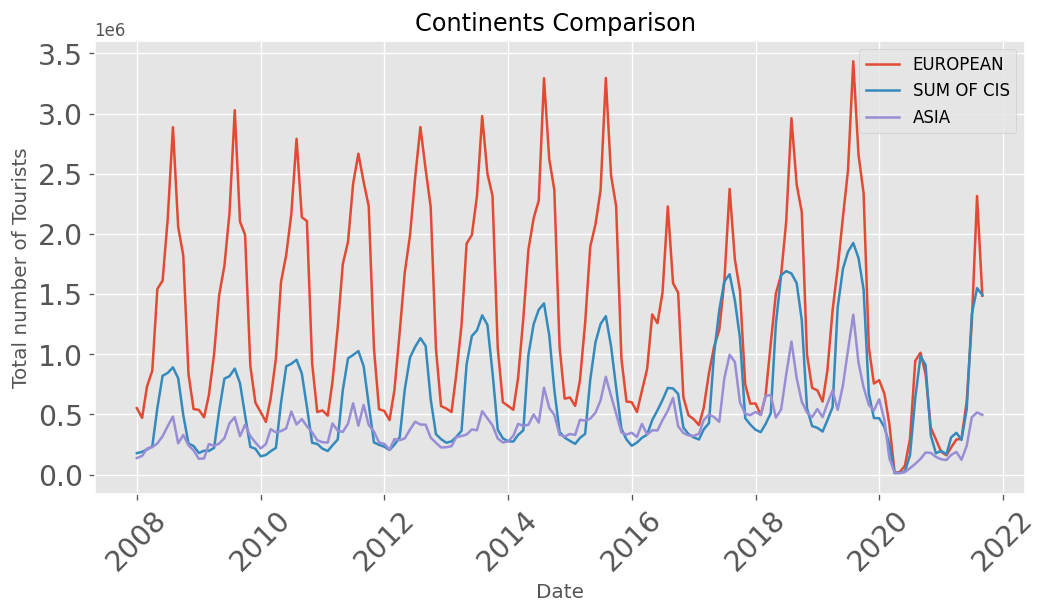

In [ ]:
plt.style.use('ggplot')
plt1=figure(figsize=(10, 5), dpi=120)
plt.xticks(fontsize=17, rotation=45)
plt.yticks(fontsize=17)

plt.plot(continents['DATE'],data_for_top3)
plt.xlabel("Date")
plt.ylabel("Total number of Tourists")
plt.title('Continents Comparison ')
plt.legend(data_for_top3)
plt.show

**These are the three continents that visited Turkey the most.**

In [ ]:
# extracting year from the column DATE 
df['YEAR'] = pd.DatetimeIndex(df['DATE']).year
df['YEAR']

0      2008
1      2008
2      2008
3      2008
4      2008
       ... 
160    2021
161    2021
162    2021
163    2021
164    2021
Name: YEAR, Length: 165, dtype: int64

In [ ]:
# returns only countries( removing all the continent data)
countries= df.drop(columns = continents.columns, axis=1 )

In [ ]:
# droping general total column
countries=countries.drop("GENERAL TOTAL", axis=1)

In [ ]:
# droping sum of africa total
countries=countries.drop("SUM OF AFRICA", axis=1)

In [ ]:
countries   # now we have all the informations for only countries

,GERMANY,ALBANIA,AUSTRIA,BELGIUM,BOSNIA AND HERZEGOVINA,BULGARIA,CZECH REPUBLIC,DENMARK,ESTONIA,FINLAND,...,SYRIA,SUUDARABIA,THAILAND,URDUN,YEMEN,AUSTRALIA,NEW ZEALAND,OCEANIA,WITHOUT NATION,YEAR
0,177233,2811,20207,12389,2546,99048,1824,5613,426,1921,...,24464,721,563,2787,116,4823,497,3,1056,2008
1,143666,2604,16295,11309,2342,82707,2064,5464,515,1723,...,24949,1499,516,2594,299,3254,394,11,947,2008
2,249797,3626,23558,21097,2952,102877,2524,11288,695,4142,...,27203,1016,1003,3280,287,3571,592,69,1233,2008
3,242531,3219,22668,30772,3539,110627,4198,10878,1098,7661,...,27704,2074,1081,3455,331,10084,2249,70,1304,2008
4,399724,4156,32265,50483,4709,148642,9286,26008,4508,12479,...,30869,2025,1005,4336,444,13011,2606,11,1481,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,60295,4076,6172,7258,4327,57573,1479,1942,3918,1100,...,7121,318,331,7551,672,615,97,13,2425,2021
161,137124,8233,10647,11089,12395,118125,5923,3525,4660,2322,...,10419,833,334,26890,1069,636,151,17,4568,2021
162,404018,11395,30798,40466,20029,156194,17405,22934,6273,4298,...,14258,1908,415,63513,2008,1234,296,23,7998,2021
163,811734,15590,99552,118913,28385,147193,20769,24917,6510,4147,...,21511,2115,519,60534,2640,1383,314,44,9982,2021


In [ ]:
#group by on year 
finalcountry=countries.groupby(['YEAR']).sum()   
finalcountry.head()

,GERMANY,ALBANIA,AUSTRIA,BELGIUM,BOSNIA AND HERZEGOVINA,BULGARIA,CZECH REPUBLIC,DENMARK,ESTONIA,FINLAND,...,SINGAPORE,SYRIA,SUUDARABIA,THAILAND,URDUN,YEMEN,AUSTRALIA,NEW ZEALAND,OCEANIA,WITHOUT NATION
YEAR,,,,,,,,,,,,,,,,,,,,,
2008,4396948,63945,505764,578680,60032,1512243,159224,277997,33686,102634,...,19143,398331,55226,10095,73305,4914,126533,23572,325,23639
2009,4481571,61247,537721,592651,54137,1623640,166505,296108,36845,138159,...,20070,501016,66324,9964,87844,6244,132472,24160,209,27553
2010,4370248,50163,497931,544728,47219,1448923,174508,314369,35136,143328,...,18921,891192,84915,9259,96406,6199,132174,24643,2812,23421
2011,4815156,53286,530800,594679,54998,1399434,222228,371195,34809,187079,...,20745,965579,116977,11081,94370,7257,152313,26762,474,26692
2012,5025660,59372,504026,612807,61644,1498461,223654,391467,35419,195490,...,22162,333728,174786,11705,101553,11233,165579,28271,3022,31330


In [ ]:
# total no of tourist every year
finalcountry['SUM OF YEAR']= finalcountry.sum(axis=1)
finalcountry['SUM OF YEAR']

YEAR
2008    26259080
2009    27155489
2010    28364579
2011    30955360
2012    31123155
2013    33560938
2014    35525027
2015    35235402
2016    24954216
2017    31678302
2018    38357588
2019    43911723
2020    12695179
2021    16133087
Name: SUM OF YEAR, dtype: int64

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

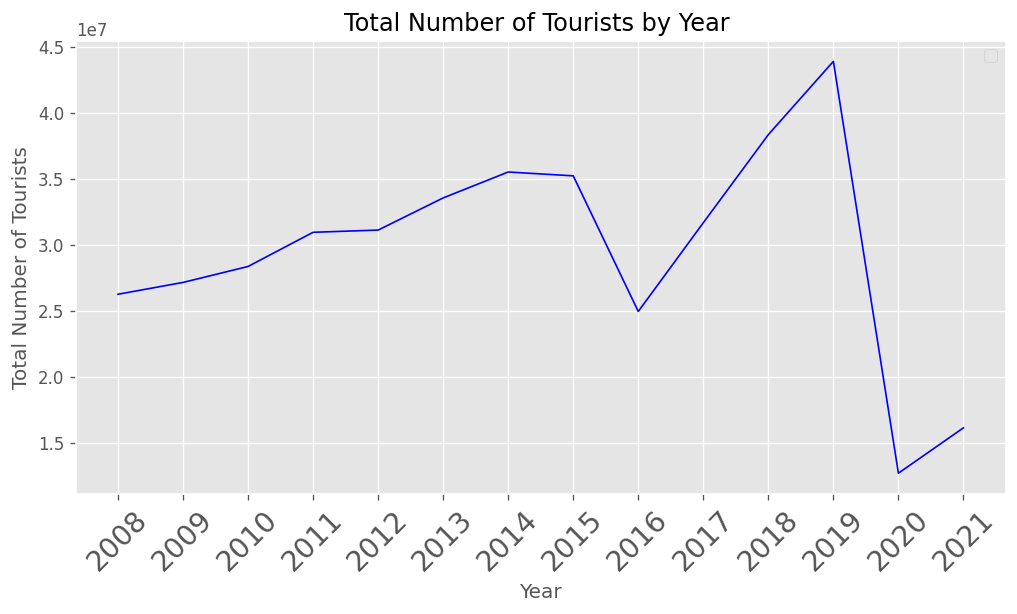

In [ ]:
# plotting the graph for above data
figure(figsize=(10, 5), dpi=120)
plt.xticks(finalcountry.index,fontsize=17, rotation=45)
plt.plot(finalcountry.index,finalcountry['SUM OF YEAR'],'b', linewidth=1)
plt.xlabel("Year")
plt.ylabel("Total Number of Tourists")
plt.title('Total Number of Tourists by Year ')
plt.legend()
plt.show

In [ ]:
# Tourists Countries in 2008 and 2018

In [ ]:
finalcountry2008=finalcountry[finalcountry.index==2008].drop(columns = ['SUM OF YEAR'], axis=1 )   # taking the data for 2008 year
w08=finalcountry2008.max().nlargest(30).index                                                      # top 30 countries
w08

Index(['GERMANY', 'RUSSIA', 'ENGLAND', 'BULGARIA', 'HOLLAND', 'IRAN', 'FRANCE',
       'GEORGIA', 'UKRAINE', 'USA', 'ITALY', 'BELGIUM', 'GREECE', 'ISRAEL',
       'AUSTRIA', 'AZERBAIJAN', 'ROMANIA', 'SWEDEN', 'SYRIA', 'POLAND',
       'SPAIN', 'DENMARK', 'SWITZERLAND', 'NORWAY', 'KAZAKHISTAN', 'IRAQ',
       'NORTHERN CYPRUS', 'SERBIA', 'CZECH REPUBLIC', 'BELARUS'],
      dtype='object')

In [ ]:
finalcountry2018=finalcountry[finalcountry.index==2018].drop(columns = ['SUM OF YEAR'], axis=1 )  # taking the data for 2018 year
w18=finalcountry2018.max().nlargest(30).index                                                     # top 30 countries
w18

Index(['RUSSIA', 'GERMANY', 'BULGARIA', 'ENGLAND', 'GEORGIA', 'IRAN',
       'UKRAINE', 'IRAQ', 'HOLLAND', 'AZERBAIJAN', 'FRANCE', 'SUUDARABIA',
       'GREECE', 'POLAND', 'ROMANIA', 'BELGIUM', 'USA', 'ISRAEL',
       'KAZAKHISTAN', 'CHINA', 'URDUN', 'SWEDEN', 'AUSTRIA', 'LEBANON',
       'DENMARK', 'KUWAIT', 'ALGERIA', 'ITALY', 'SWITZERLAND',
       'NORTHERN CYPRUS'],
      dtype='object')

In [ ]:
# creating a dataframe for w08 and w18
worldcountry=pd.DataFrame(w08, columns=['2008'])

In [ ]:
worldcountry['2018']=w18     # inserting w18 data into the dataframe

In [ ]:
worldcountry

,2008,2018
0,GERMANY,RUSSIA
1,RUSSIA,GERMANY
2,ENGLAND,BULGARIA
3,BULGARIA,ENGLAND
4,HOLLAND,GEORGIA
5,IRAN,IRAN
6,FRANCE,UKRAINE
7,GEORGIA,IRAQ
8,UKRAINE,HOLLAND
9,USA,AZERBAIJAN


In [ ]:
# creating month column
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month_name().str[:3]
df['MONTH'].head(12)

0     Jan
1     Feb
2     Mar
3     Apr
4     May
5     Jun
6     Jul
7     Aug
8     Sep
9     Oct
10    Nov
11    Dec
Name: MONTH, dtype: object

In [ ]:
# droping some unwanted columns
monthdata= df.drop(columns = ['GENERAL TOTAL','YEAR','OTHER ASIA','ASIA',
                                'OTHER AFRICA','OTHER AMERICA','AMERICA','SUM OF AFRICA',
                                'AFRICA', 'OTHER EUROPE','EUROPEAN','DATE'], axis=1 )

In [ ]:
#checking month data after deleting some columns
monthdata.head()

,GERMANY,ALBANIA,AUSTRIA,BELGIUM,BOSNIA AND HERZEGOVINA,BULGARIA,CZECH REPUBLIC,DENMARK,ESTONIA,FINLAND,...,SYRIA,SUUDARABIA,THAILAND,URDUN,YEMEN,AUSTRALIA,NEW ZEALAND,OCEANIA,WITHOUT NATION,MONTH
0,177233,2811,20207,12389,2546,99048,1824,5613,426,1921,...,24464,721,563,2787,116,4823,497,3,1056,Jan
1,143666,2604,16295,11309,2342,82707,2064,5464,515,1723,...,24949,1499,516,2594,299,3254,394,11,947,Feb
2,249797,3626,23558,21097,2952,102877,2524,11288,695,4142,...,27203,1016,1003,3280,287,3571,592,69,1233,Mar
3,242531,3219,22668,30772,3539,110627,4198,10878,1098,7661,...,27704,2074,1081,3455,331,10084,2249,70,1304,Apr
4,399724,4156,32265,50483,4709,148642,9286,26008,4508,12479,...,30869,2025,1005,4336,444,13011,2606,11,1481,May


In [ ]:
# group by on month to check which month has the highest tourism rate
finalmonth=monthdata.groupby(['MONTH']).sum().mean(axis=1)
finalmonth=finalmonth.astype('int')                          # converting into integer
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']    # giving the new order


In [ ]:
finalmonth=finalmonth.reindex(new_order, axis=0)   # using new order here
finalmonth

MONTH
Jan    224986
Feb    205877
Mar    260080
Apr    316600
May    507593
Jun    624719
Jul    748768
Aug    908691
Sep    779619
Oct    597043
Nov    298114
Dec    222852
dtype: int64

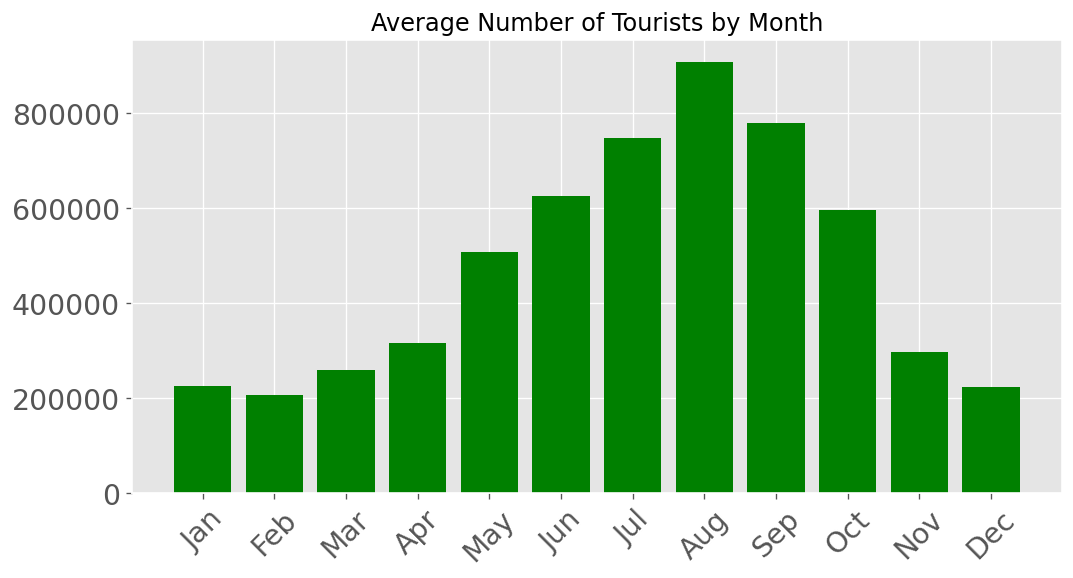

In [ ]:
#plotting the bar graph for the above data
figure(figsize=(10, 5), dpi=120)
plt.xticks(fontsize=17, rotation=45)
plt.yticks(fontsize=17)
plt.title('Average Number of Tourists by Month')
plt.bar(finalmonth.index,finalmonth, color='green')
plt.show()

In [ ]:
# from this above ggraph we can conclude that turkey gets huge number of tourist rate in the middle of the year

**MODEL BUILDING**(**XGBOOST REGRESSOR**)

In [ ]:
X=df1.iloc[:,1:102]     # INDEPENDANT VARIABLES
Y=df1.iloc[:,102:]      # DEPENDANT VARIABLES

In [ ]:
# printing  INDEPENDANT VARIABLES and DEPENDANT VARIABLES
print(X)
print(Y)

     GERMANY  ALBANIA  AUSTRIA  BELGIUM  BOSNIA AND HERZEGOVINA  BULGARIA  \
0     177233     2811    20207    12389                    2546     99048   
1     143666     2604    16295    11309                    2342     82707   
2     249797     3626    23558    21097                    2952    102877   
3     242531     3219    22668    30772                    3539    110627   
4     399724     4156    32265    50483                    4709    148642   
..       ...      ...      ...      ...                     ...       ...   
160    60295     4076     6172     7258                    4327     57573   
161   137124     8233    10647    11089                   12395    118125   
162   404018    11395    30798    40466                   20029    156194   
163   811734    15590    99552   118913                   28385    147193   
164   522290    10471    43251    48387                   19343    160425   

     CZECH REPUBLIC  DENMARK  ESTONIA  FINLAND  ...  SUUDARABIA  THAILAND  

In [ ]:
# importing all the libraries that is needed for model building
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
# splitting the data into train and test ( test will have 20% of the original data)
X_train, X_test, Y_train, Y_test= train_test_split( X, Y, test_size=0.2, random_state= 2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)    # checking the size of original and split data

(165, 101) (132, 101) (33, 101)


In [ ]:
# feature scaling
scaler =StandardScaler().fit(X_train)

In [ ]:
model=XGBRegressor()   # initiating the model
model.fit(X_train, Y_train)  # fitting the data

[19:47:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# prediction on train data

In [ ]:
Y_train_pred=model.predict(X_train)     # predicting y train by using x train data
Y_train_pred

array([2301190.5 , 2062380.5 , 4322827.  ,  574049.4 , 1569337.1 ,
       1867035.2 , 1190190.6 , 1677845.  , 4136830.  , 4143345.  ,
       1478913.4 , 4225047.5 , 5716573.5 , 5740980.5 , 1268257.8 ,
        755305.7 , 1531987.6 , 4852932.  , 1044921.8 , 2271723.  ,
       2699617.  , 3567250.  , 1794300.2 ,  906450.5 , 1625962.5 ,
       4867935.5 , 1081133.  , 5052197.5 , 1281017.2 , 1597031.2 ,
       1702760.4 , 3347670.2 , 4293483.5 , 5969513.5 , 3065068.8 ,
       3833312.8 , 2086120.8 , 3439839.5 , 1186942.9 ,  124983.86,
       1187782.9 , 3998861.5 , 4507896.  , 3093004.2 , 4629924.  ,
       2437923.8 , 4573093.5 , 1666826.6 , 1774454.8 ,  908128.3 ,
        529722.4 , 1362196.  , 3606714.5 , 2834734.2 , 1124146.9 ,
       3853343.8 , 2360954.8 , 4490353.5 ,  852950.4 , 1914042.4 ,
       4305441.5 , 4594900.5 , 1192033.8 , 1704415.2 , 1873220.2 ,
       2828712.2 , 1151549.8 , 1630537.9 , 3007904.5 , 1466417.9 ,
       3549249.8 , 1849246.4 , 1275989.2 , 3604052.8 , 1497813

In [ ]:
#evaluation

In [ ]:
metrics.r2_score(Y_train,Y_train_pred)            # model evaluation using r2 score

0.9998764636213129

In [ ]:
# we have got very good score on train data

In [ ]:
# test data prediction

In [ ]:
Y_test_pred=model.predict(X_test)         # predicting y_test using x_test data
Y_test_pred

array([4465699.5 , 1263724.4 , 4248268.  ,  864430.2 ,  882292.7 ,
       1700178.1 , 3780542.  ,   94433.84, 3032785.5 , 3696733.8 ,
       1320937.  , 5299580.  , 5152867.5 , 2269686.5 , 1970771.4 ,
       1035166.1 , 3737009.  , 1078147.8 , 1137789.8 , 3318691.  ,
        972483.56, 1870593.1 , 5918798.5 , 3246028.2 , 1010033.44,
       2346053.  , 3648973.2 ,  946059.5 , 5556831.5 , 4451146.  ,
       4483661.  , 3401536.5 , 1956445.2 ], dtype=float32)

In [ ]:
# evaluation

In [ ]:
metrics.r2_score(Y_test,Y_test_pred)    # checking the model using r2 score

0.9729653765523566

In [ ]:
# we have got 97% in test set ,so we can say that our model is predicting in a better way 